In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [462]:
covid=pd.read_csv('covid19_clinical_dataset.csv')
covid.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
df=pd.DataFrame(data=covid)
df.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [464]:
null_values=df.isnull().sum()

In [465]:
null_values[null_values>0]

Hematocrit                            5041
Hemoglobin                            5041
Platelets                             5042
Mean platelet volume                  5045
Red blood Cells                       5042
                                      ... 
HCO3 (arterial blood gas analysis)    5617
pO2 (arterial blood gas analysis)     5617
Arteiral Fio2                         5624
Phosphor                              5624
ctO2 (arterial blood gas analysis)    5617
Length: 105, dtype: int64

In [466]:
use_col=null_values[null_values<df.shape[0]/20].reset_index()
use_col.head(20)

,index,0
0,Patient ID,0
1,Patient age quantile,0
2,SARS-Cov-2 exam result,0
3,"Patient addmited to regular ward (1=yes, 0=no)",0
4,Patient addmited to semi-intensive unit (1=yes...,0
5,Patient addmited to intensive care unit (1=yes...,0


In [467]:
use_col=df[use_col['index']]
use_col.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,negative,0,0,0
1,126e9dd13932f68,17,negative,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0
3,f7d619a94f97c45,5,negative,0,0,0
4,d9e41465789c2b5,15,negative,0,0,0


In [468]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [469]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [470]:
use_col.describe(include='all')

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
count,5644,5644.000000,5644,5644.000000,5644.000000,5644.000000
unique,5644,NaN,2,NaN,NaN,NaN
top,35f877055a78e0a,NaN,negative,NaN,NaN,NaN
freq,1,NaN,5086,NaN,NaN,NaN
mean,NaN,9.318391,NaN,0.013997,0.008859,0.007264
std,NaN,5.777903,NaN,0.117489,0.093713,0.084929
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,4.000000,NaN,0.000000,0.000000,0.000000
50%,NaN,9.000000,NaN,0.000000,0.000000,0.000000
75%,NaN,14.000000,NaN,0.000000,0.000000,0.000000


In [92]:
use_col.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')

In [93]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [94]:
use_col.dtypes

Patient ID                                               object
Patient age quantile                                      int64
SARS-Cov-2 exam result                                   object
Patient addmited to regular ward (1=yes, 0=no)            int64
Patient addmited to semi-intensive unit (1=yes, 0=no)     int64
Patient addmited to intensive care unit (1=yes, 0=no)     int64
dtype: object

In [95]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [96]:
use_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 6 columns):
Patient ID                                               5644 non-null object
Patient age quantile                                     5644 non-null int64
SARS-Cov-2 exam result                                   5644 non-null object
Patient addmited to regular ward (1=yes, 0=no)           5644 non-null int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644 non-null int64
Patient addmited to intensive care unit (1=yes, 0=no)    5644 non-null int64
dtypes: int64(4), object(2)
memory usage: 264.7+ KB


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [98]:
use_col.shape

(5644, 6)

In [99]:
df.shape

(5644, 111)

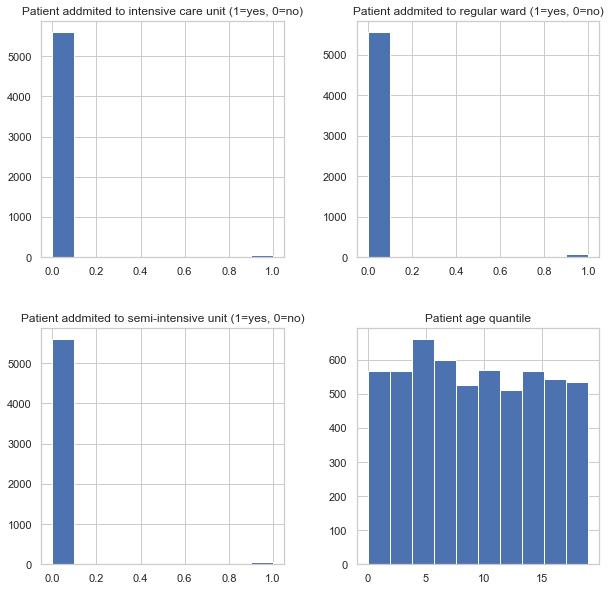

In [100]:
use_col.hist(figsize=(10,10))
plt.show()

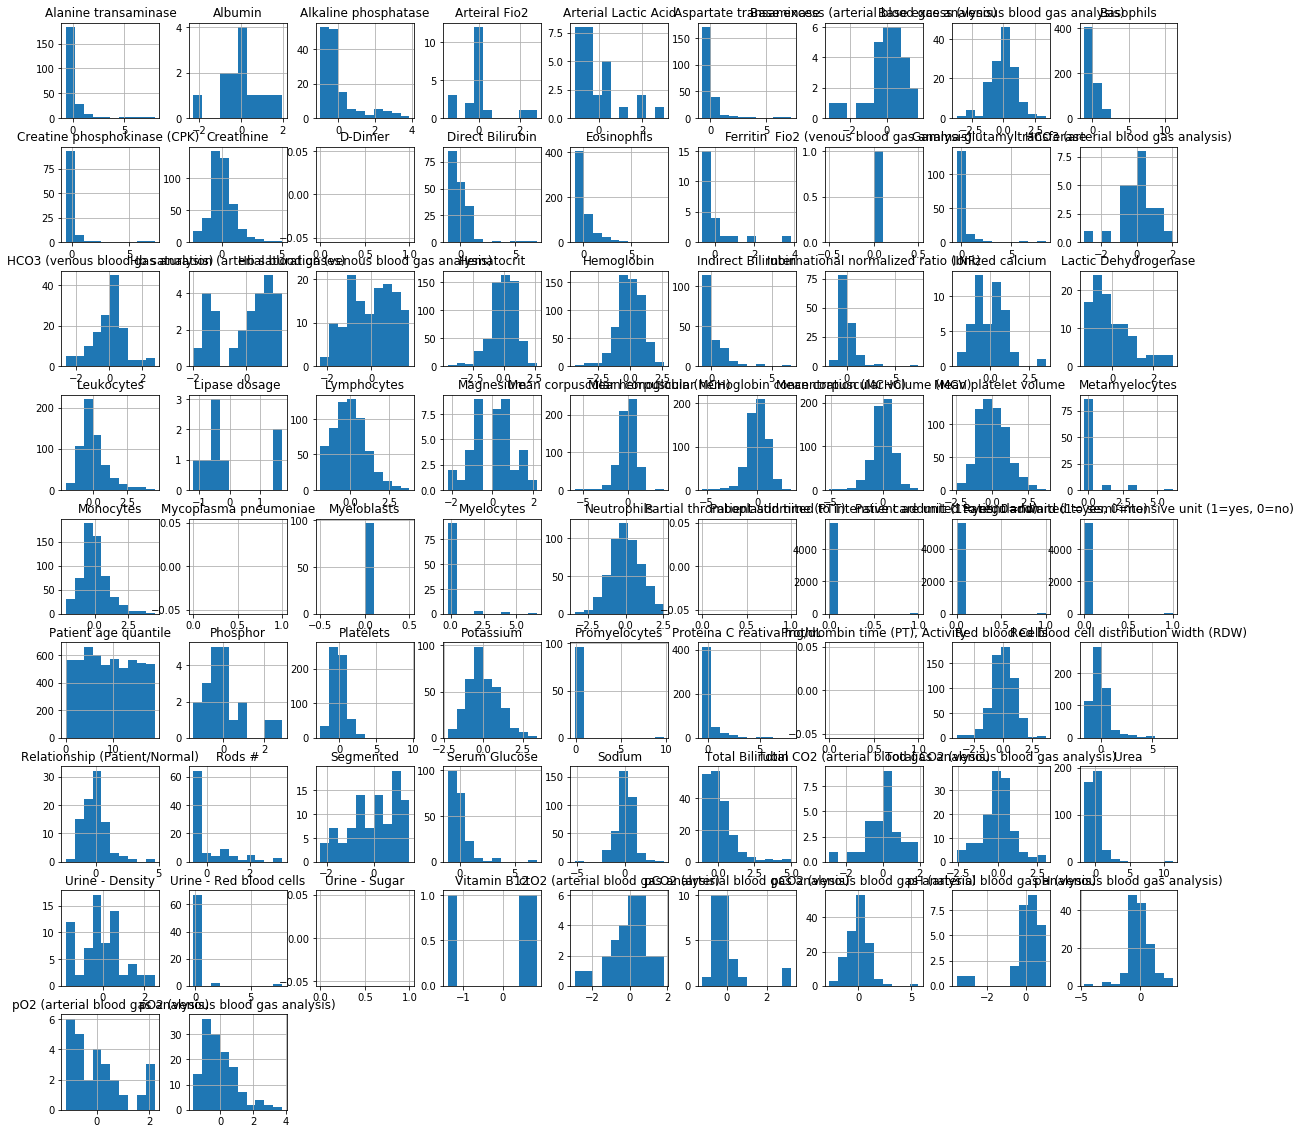

In [27]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1cccceb1788>,
 'caps': [<matplotlib.lines.Line2D at 0x1cccceb1d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cccca54ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ccccecb3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ccccecbb08>],
 'means': []}

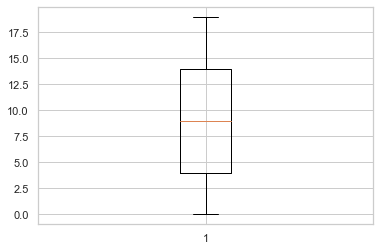

In [64]:
plt.boxplot(df['Patient age quantile'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ccccfa6e08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ccccf94ec8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cccd6a6388>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cccbf98dc8>}

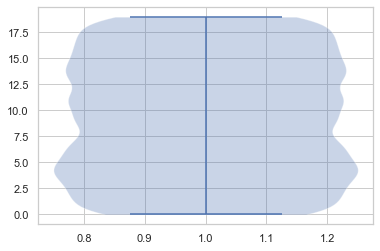

In [65]:
plt.violinplot(df['Patient age quantile'])

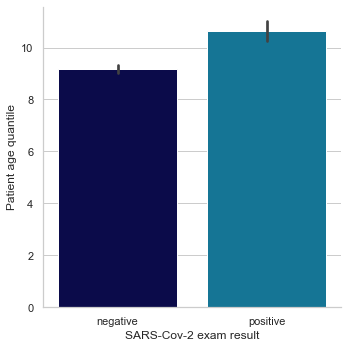

In [66]:
sns.catplot('SARS-Cov-2 exam result','Patient age quantile',data=df,palette='ocean',kind='bar')

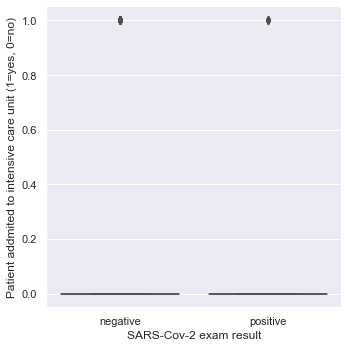

In [67]:
sns.set(style='darkgrid')
sns.catplot('SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)',data=df,palette='rainbow',kind='box')

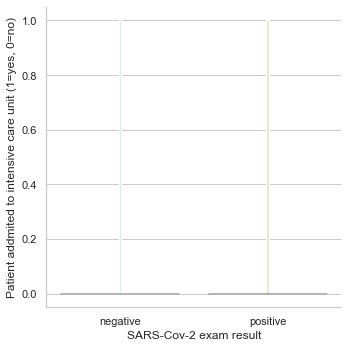

In [68]:
sns.set_style('whitegrid')
sns.catplot('SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)',data=df,palette='rainbow',kind='boxen')

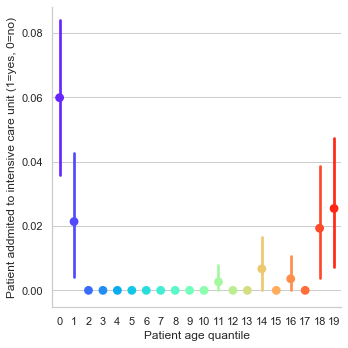

In [69]:
sns.catplot('Patient age quantile','Patient addmited to intensive care unit (1=yes, 0=no)',data=df,palette='rainbow',kind='point')

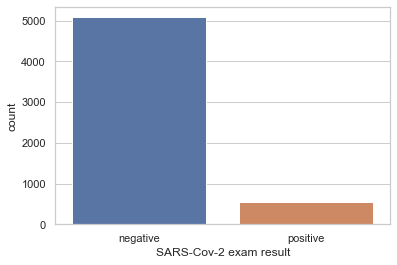

In [33]:
sns.countplot(df['SARS-Cov-2 exam result'])

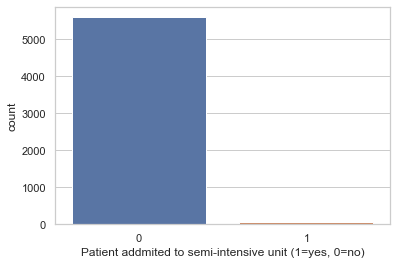

In [70]:
sns.countplot(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'])

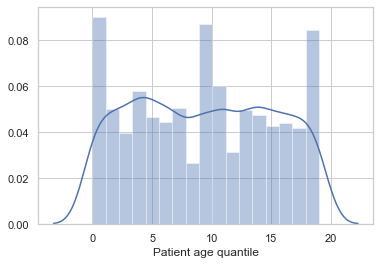

In [71]:
sns.distplot(df['Patient age quantile'])

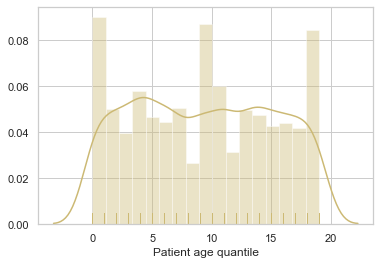

In [72]:
sns.distplot(df['Patient age quantile'],color='y',rug=True)

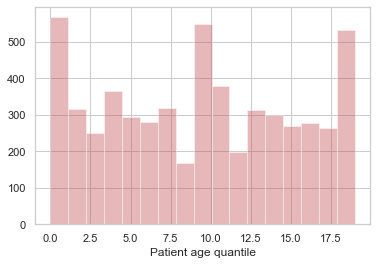

In [73]:
sns.distplot(df['Patient age quantile'],color='r',kde=False)

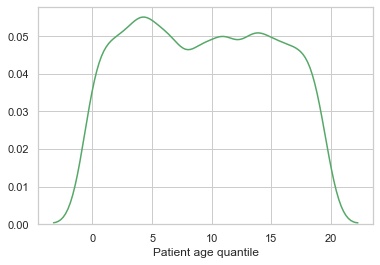

In [38]:
sns.distplot(df['Patient age quantile'],color='g',hist=False)

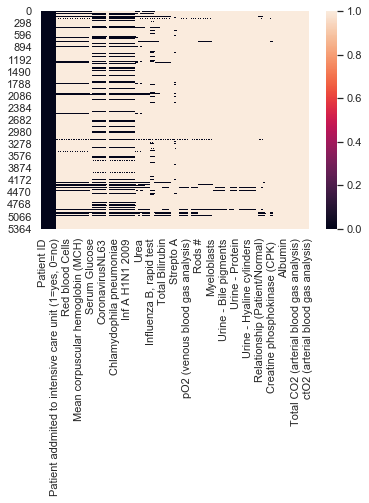

In [40]:
sns.heatmap(df.isnull())

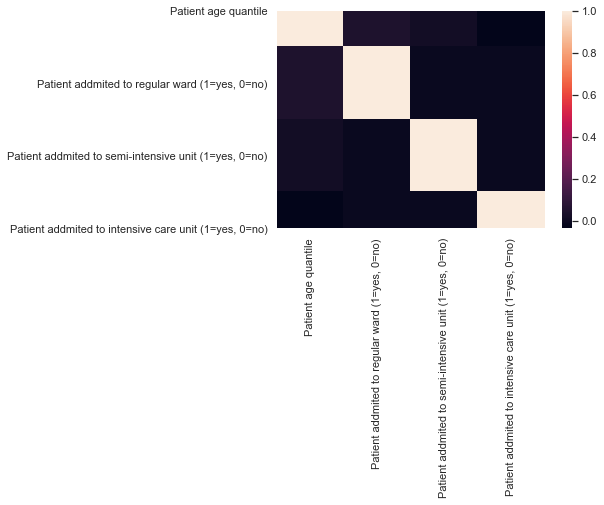

In [101]:
sns.heatmap(use_col.corr())

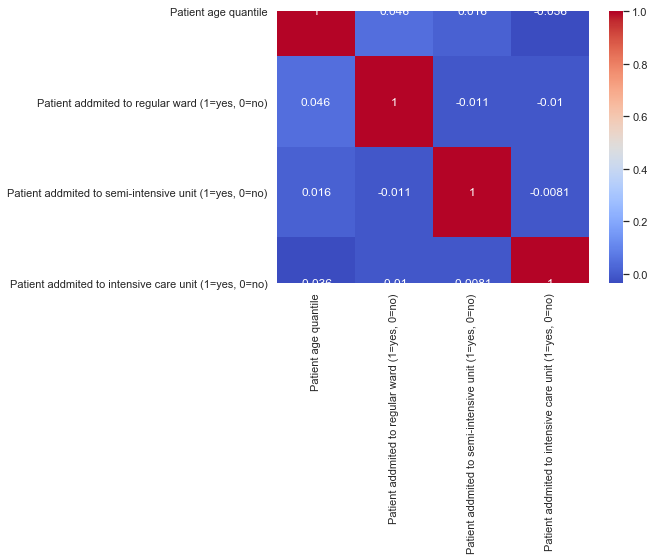

In [102]:
plt.figure(figsize=(7,5))
sns.heatmap(use_col.corr(),cmap='coolwarm',annot=True)

In [103]:
use_col.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,negative,0,0,0
1,126e9dd13932f68,17,negative,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0
3,f7d619a94f97c45,5,negative,0,0,0
4,d9e41465789c2b5,15,negative,0,0,0


In [104]:
use_col.drop('Patient ID',inplace=True,axis=1)

In [105]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# I am going to perform TASK 1

In [107]:
x=use_col.drop('SARS-Cov-2 exam result',axis=1)
x.shape

(5644, 4)

In [108]:
y=use_col['SARS-Cov-2 exam result']
y.head()

0    negative
1    negative
2    negative
3    negative
4    negative
Name: SARS-Cov-2 exam result, dtype: object

In [109]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [110]:
scale=StandardScaler()

In [111]:
x=scale.fit_transform(x)

In [112]:
le=LabelEncoder()

In [113]:
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

In [114]:
model_Task1=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

In [115]:
max_accu_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for c in model_Task1:
        c.fit(x_train,y_train)
        c.score(x_train,y_train)
        predc=c.predict(x_test)
        accu_value=accuracy_score(y_test,predc)
        print('Accuracy score correspond to random state',r_state ,'is',accu_value)
        if accu_value>max_accu_score:
            max_accu_score=accu_value
            final_state=r_state
            final_model=c
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_accu_score,'and model is',final_model)

Accuracy score correspond to random state 40 is 0.9138486312399355
Accuracy score correspond to random state 40 is 0.9146537842190016
Accuracy score correspond to random state 40 is 0.9146537842190016
Accuracy score correspond to random state 41 is 0.9033816425120773
Accuracy score correspond to random state 41 is 0.9049919484702094
Accuracy score correspond to random state 41 is 0.9049919484702094
Accuracy score correspond to random state 42 is 0.9074074074074074
Accuracy score correspond to random state 42 is 0.9057971014492754
Accuracy score correspond to random state 42 is 0.9057971014492754
Accuracy score correspond to random state 43 is 0.9001610305958132
Accuracy score correspond to random state 43 is 0.9009661835748792
Accuracy score correspond to random state 43 is 0.9001610305958132
Accuracy score correspond to random state 44 is 0.8760064412238325
Accuracy score correspond to random state 44 is 0.9090177133655395
Accuracy score correspond to random state 44 is 0.909017713365

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=40)

In [117]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9146537842190016
[[1129    3]
 [ 103    7]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1132
           1       0.70      0.06      0.12       110

    accuracy                           0.91      1242
   macro avg       0.81      0.53      0.54      1242
weighted avg       0.90      0.91      0.88      1242



In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameter={'criterion':('gini','entropy'),'n_estimators':range(10,20)}
grid=GridSearchCV(rfc,parameter)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [120]:
rfc=RandomForestClassifier(criterion='entropy',n_estimators=12)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9162640901771336
[[1129    3]
 [ 101    9]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1132
           1       0.75      0.08      0.15       110

    accuracy                           0.92      1242
   macro avg       0.83      0.54      0.55      1242
weighted avg       0.90      0.92      0.88      1242



In [121]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.9        0.90079717 0.90345438 0.90868794 0.88475177]
0.8995382532712688
0.007993634689660184


In [59]:
# Now i am going to perform TASK2 in this Dataset According to question

In [471]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [473]:
df.groupby('Patient addmited to regular ward (1=yes, 0=no)').count()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
"Patient addmited to regular ward (1=yes, 0=no)",,,,,,,,,,,,,,,,,,,,,
0,5565,5565,5565,5565,5565,545,545,544,542,544,...,20,20,20,20,20,20,20,14,20,20
1,79,79,79,79,79,58,58,58,57,58,...,7,7,7,7,7,7,7,6,0,7


In [474]:
df.groupby('Patient addmited to semi-intensive unit (1=yes, 0=no)').count()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
"Patient addmited to semi-intensive unit (1=yes, 0=no)",,,,,,,,,,,,,,,,,,,,,
0,5594,5594,5594,5594,5594,561,561,560,557,560,...,17,17,17,17,17,17,17,15,14,17
1,50,50,50,50,50,42,42,42,42,42,...,10,10,10,10,10,10,10,5,6,10


In [475]:
df.groupby('Patient addmited to intensive care unit (1=yes, 0=no)').count()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
"Patient addmited to intensive care unit (1=yes, 0=no)",,,,,,,,,,,,,,,,,,,,,
0,5603,5603,5603,5603,5603,574,574,573,570,573,...,22,22,22,22,22,22,22,15,15,22
1,41,41,41,41,41,29,29,29,29,29,...,5,5,5,5,5,5,5,5,5,5


In [476]:
df.drop(['Patient ID','SARS-Cov-2 exam result'],axis=1,inplace=True)

In [477]:
df.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
def Task_2(row):
    check=0
    check +=1 if(row['Patient addmited to regular ward (1=yes, 0=no)']==1)else 0
    check +=2 if(row['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1)else 0
    check +=3 if(row['Patient addmited to intensive care unit (1=yes, 0=no)']==1)else 0
    row['target'] = check
    return row
df=df.apply(Task_2,axis=1)

df.drop(['Patient addmited to regular ward (1=yes, 0=no)',
        'Patient addmited to semi-intensive unit (1=yes, 0=no)',
        'Patient addmited to intensive care unit (1=yes, 0=no)'],axis=1,inplace=True)
df.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),target
0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [479]:
df.shape

(5644, 107)

In [480]:
def percentage_missing_data(row, total_samples=5644):
    missing=row[0]/total_samples
    row['missing']=missing
    return row
def get_missing_data(data):
    null_df=pd.DataFrame(data.copy().isnull().sum().reset_index())
    null_df=null_df[null_df[0]!=0].reset_index(drop=True)
    null_df=null_df.apply(percentage_missing_data,total_samples=len(data),axis=1)
    null_df.columns=['Columns Name','Number of missing results','Percentage of missing values']
    null_df=null_df
    return null_df

In [481]:
missing_values=get_missing_data(df)
missing_values.T

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
Columns Name,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Number of missing results,5041,5041,5042,5045,5042,5042,5042,5042,5042,5042,...,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percentage of missing values,0.893161,0.893161,0.893338,0.89387,0.893338,0.893338,0.893338,0.893338,0.893338,0.893338,...,0.995216,0.995216,0.995216,0.995216,0.995216,0.995216,0.995216,0.996456,0.996456,0.995216


In [482]:
df.isnull().sum()

Patient age quantile                     0
Hematocrit                            5041
Hemoglobin                            5041
Platelets                             5042
Mean platelet volume                  5045
                                      ... 
pO2 (arterial blood gas analysis)     5617
Arteiral Fio2                         5624
Phosphor                              5624
ctO2 (arterial blood gas analysis)    5617
target                                   0
Length: 107, dtype: int64

In [483]:
remove_columns=missing_values.loc[missing_values['Percentage of missing values']>=0.80]['Columns Name']

In [484]:
len(remove_columns)

88

In [485]:
df.drop(remove_columns,axis=1,inplace=True)
df.shape

(5644, 19)

In [486]:
df.head()

,Patient age quantile,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,target
0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0


In [487]:
df.isnull().sum()

Patient age quantile              0
Respiratory Syncytial Virus    4290
Influenza A                    4290
Influenza B                    4290
Parainfluenza 1                4292
CoronavirusNL63                4292
Rhinovirus/Enterovirus         4292
Coronavirus HKU1               4292
Parainfluenza 3                4292
Chlamydophila pneumoniae       4292
Adenovirus                     4292
Parainfluenza 4                4292
Coronavirus229E                4292
CoronavirusOC43                4292
Inf A H1N1 2009                4292
Bordetella pertussis           4292
Metapneumovirus                4292
Parainfluenza 2                4292
target                            0
dtype: int64

In [488]:
df.replace('not_detected',0,inplace=True)

In [489]:
df.replace('detected',1,inplace=True)

In [492]:
df['Respiratory Syncytial Virus'].unique()

array([nan,  0.,  1.])

In [493]:
df.columns

Index(['Patient age quantile', 'Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'target'],
      dtype='object')

In [494]:
df['Influenza A'].unique()

array([nan,  0.,  1.])

In [495]:
df['Metapneumovirus'].unique()

array([nan,  0.,  1.])

In [496]:
df.dropna(axis=0,inplace=True)

In [497]:
df.isnull().sum()

Patient age quantile           0
Respiratory Syncytial Virus    0
Influenza A                    0
Influenza B                    0
Parainfluenza 1                0
CoronavirusNL63                0
Rhinovirus/Enterovirus         0
Coronavirus HKU1               0
Parainfluenza 3                0
Chlamydophila pneumoniae       0
Adenovirus                     0
Parainfluenza 4                0
Coronavirus229E                0
CoronavirusOC43                0
Inf A H1N1 2009                0
Bordetella pertussis           0
Metapneumovirus                0
Parainfluenza 2                0
target                         0
dtype: int64

In [498]:
df.shape

(1352, 19)

In [499]:
df.head()

,Patient age quantile,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,target
1,17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [500]:
x=df.iloc[:,0:-1]
x.shape

(1352, 18)

In [501]:
y=df.iloc[:,-1]
y.shape

(1352,)

In [502]:
Scale=StandardScaler()

In [503]:
x=scale.fit_transform(x)

In [507]:
model_Task2=[KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]

In [508]:
max_accu_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for c in model_Task2:
        c.fit(x_train,y_train)
        c.score(x_train,y_train)
        predc=c.predict(x_test)
        accu_value=accuracy_score(y_test,predc)
        print('Accuracy score correspond to random state',r_state ,'is',accu_value)
        if accu_value>max_accu_score:
            max_accu_score=accu_value
            final_state=r_state
            final_model=c
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_accu_score,'and model is',final_model)

Accuracy score correspond to random state 40 is 0.9261744966442953
Accuracy score correspond to random state 40 is 0.9161073825503355
Accuracy score correspond to random state 40 is 0.9261744966442953
Accuracy score correspond to random state 40 is 0.9161073825503355
Accuracy score correspond to random state 41 is 0.8926174496644296
Accuracy score correspond to random state 41 is 0.8791946308724832
Accuracy score correspond to random state 41 is 0.8926174496644296
Accuracy score correspond to random state 41 is 0.8859060402684564
Accuracy score correspond to random state 42 is 0.8959731543624161
Accuracy score correspond to random state 42 is 0.889261744966443
Accuracy score correspond to random state 42 is 0.8926174496644296
Accuracy score correspond to random state 42 is 0.889261744966443
Accuracy score correspond to random state 43 is 0.8926174496644296
Accuracy score correspond to random state 43 is 0.8993288590604027
Accuracy score correspond to random state 43 is 0.89932885906040

In [509]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=52)

In [511]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9429530201342282
[[281   0   0   0]
 [ 10   0   0   0]
 [  4   0   0   0]
 [  3   0   0   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       281
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.94       298
   macro avg       0.24      0.25      0.24       298
weighted avg       0.89      0.94      0.92       298



In [514]:
parameter={'algorithm':('auto','ball_tree','kd_tree','brute'),'leaf_size':range(30,40)}
grid=GridSearchCV(knn,parameter)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'algorithm': 'auto', 'leaf_size': 30}


In [515]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9429530201342282
[[281   0   0   0]
 [ 10   0   0   0]
 [  4   0   0   0]
 [  3   0   0   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       281
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.94       298
   macro avg       0.24      0.25      0.24       298
weighted avg       0.89      0.94      0.92       298



In [516]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.89705882 0.900369   0.88560886 0.89591078 0.90334572]
0.8964586377768435
0.006018323084476899


In [517]:
from sklearn.externals import joblib

In [518]:
joblib.dump(knn,'BrazilCovidFile.obj')

['BrazilCovidFile.obj']